## Projeto de PDS 2019.1
Igor Dias da Silva

---
#### Questão 1.1

 Utilizando janelamento, crie um filtro FIR passa alta com as seguintes especificações:
 
 ωs = 0.6π, ωp = 0.75π; As = 50 dB

Justifique todas as suas decisões de projeto. 

In [1]:
import numpy as np                  
from scipy import signal,special     
import matplotlib.pyplot as plt     

In [2]:
# Dados da questão
Ws = 0.3*np.pi
Wp = 0.2*np.pi
As = 50

Wc = (Ws + Wp)/2

delta_W = np.abs(Wp - Ws)

beta = 0.5842*(As - 21)**0.4 + 0.07886*(As - 21) # Para As =  50

M = int(np.ceil(((As - 7.95)/(14.36*delta_W/(2*np.pi))+1)) + 1)

<StemContainer object of 3 artists>

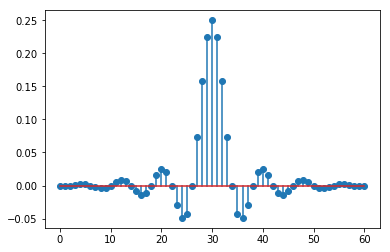

In [3]:
filtro = signal.firwin(M, Wc/np.pi, window=('kaiser', beta))
plt.stem(filtro)

Text(0.5, 0, 'Freq [rad/amostra]')

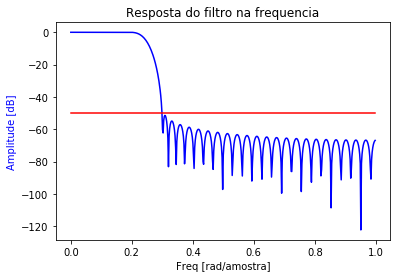

In [6]:
w, h = signal.freqz(filtro)
fig = plt.figure()
plt.title('Resposta do filtro na frequencia')
ax1 = fig.add_subplot(111)
plt.plot(w/np.pi, 20 * np.log10(abs(h)), 'b')
plt.plot(w/np.pi , np.full(len(w), -50) , 'r')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Freq [rad/amostra]')